In [30]:
import pandas as pd
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
stat_data = pd.read_csv('C:\\Users\\Uldum\\Downloads\\training_mush.csv')
test_data = pd.read_csv('C:\\Users\\Uldum\\Downloads\\testing_mush.csv')
test_y_data = pd.read_csv('C:\\Users\\Uldum\\Downloads\\testing_y_mush.csv')

In [5]:
stat_data.head(10)
test_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [6]:
X = stat_data.drop(columns = 'class')
y = stat_data['class']
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,3,1
6089,3,2,2,0,2,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,0
6090,5,2,3,0,1,1,0,1,9,0,...,2,7,7,0,2,1,4,3,4,0
6091,3,2,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1


In [7]:
clf_rf = RandomForestClassifier(random_state=0, n_jobs=-1)
parametrs = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_split': range(2, 10, 2), 'min_samples_leaf': range(1, 8)}
gs_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)
gs_cv_clf.fit(X, y)
gs_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

<AxesSubplot:>

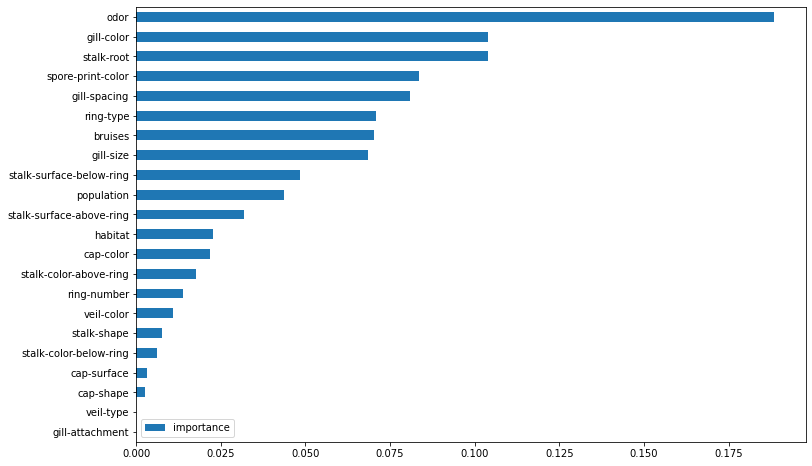

In [8]:
# вес фичей для оченки их значимости для результата
gs_cv_clf.best_estimator_.feature_importances_
imp = pd.DataFrame(gs_cv_clf.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [14]:
# предсказанное число несъедобных грибов на тестовых данных
[*gs_cv_clf.best_estimator_.predict(test_data)].count(1)

976

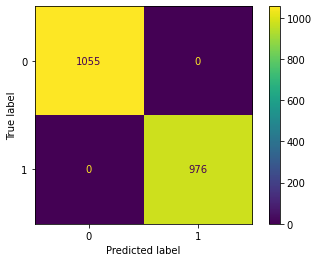

In [15]:
# строим конфьюжн матрицу сразу из эстиматора
# показывает число результатов, в которых мы предсказали съедобные грибы (pred0, true0), которые действительно съедобны 1055
# показывает число результатов, в которых мы предсказали съедобность гриба (pred0, true1), хотя они не съедобны (могила) 0
# показывает число результатов, в которых мы предсказали несъедобность (pred1, true0), хотя они съедобный 0
# показывает число результатов, в которых мы предсказали несъедобность (pred1, true1) и были правы 976
ConfusionMatrixDisplay.from_estimator(gs_cv_clf.best_estimator_, test_data, test_y_data)

In [22]:
# точность алгоритма (аномалия)
precision_score(test_y_data, gs_cv_clf.best_estimator_.predict(test_data))

1.0

In [24]:
# полнота алгоритма (аномалия)
recall_score(test_y_data, gs_cv_clf.best_estimator_.predict(test_data))

1.0

In [19]:
# странные показатели метрики и конфьюжн матрицы. Могут говорить о переобученности классификатора, либо о низком качестве данных
# хотя данные тренировочные и тестовые были из разных файлов. Энивэй, что получилось - то получилось
# мера f1 - мера баланса между точностью (насколько точно мы относим объект к положительному классу, снижая ложные срабатывания)
# и полнотой (насолько полно мы относим объекты к положительному классу, снижая пропуск объектов положительного класса)
f1_score(test_y_data, gs_cv_clf.best_estimator_.predict(test_data))

1.0

In [29]:
# пробуем найти ROC (соотношение между полнотой алгоритма и ошибками алгоритма в плане ложных срабатываний)
roc_auc_score(test_y_data, gs_cv_clf.best_estimator_.predict_proba(test_data)[:,1])

1.0

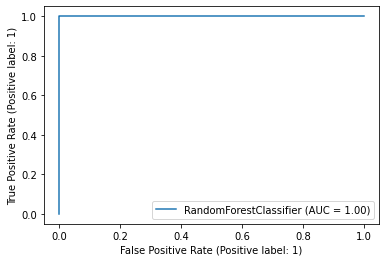

In [31]:
# пробуем строить ROC (идеальный пример, когда алгоритм не ошибается) НЕВОЗМОЖЕН В РЕАЛЬНОСТИ
RocCurveDisplay.from_estimator(gs_cv_clf.best_estimator_, test_data, test_y_data)